In [1]:
import pandas as pd
import matplotlib as plt
import bls

In [2]:
cpi = bls.get_series('CUUR0000SA0')
cpi.to_csv('bls_cpi_data.csv')
cpi_data = pd.read_csv('bls_cpi_data.csv')
cpi_data.columns = 'Date','CPI'

No Data Available for Series CUUR0000SA0 Year: 2021


In [3]:
cpi_data

,Date,CPI
0,2002-01,177.100
1,2002-02,177.800
2,2002-03,178.800
3,2002-04,179.800
4,2002-05,179.800
...,...,...
222,2020-07,259.101
223,2020-08,259.918
224,2020-09,260.280
225,2020-10,260.388


In [4]:
cpi_data['Date'] = cpi_data['Date'].str.replace('-03', 'Q1')
cpi_data['Date'] = cpi_data['Date'].str.replace('-06', 'Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-09', 'Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-12', 'Q4')
cpi_data['Date']

0      2002-01
1      2002-02
2       2002Q1
3      2002-04
4      2002-05
        ...   
222    2020-07
223    2020-08
224     2020Q3
225    2020-10
226    2020-11
Name: Date, Length: 227, dtype: object

In [5]:
cpi_data

,Date,CPI
0,2002-01,177.100
1,2002-02,177.800
2,2002Q1,178.800
3,2002-04,179.800
4,2002-05,179.800
...,...,...
222,2020-07,259.101
223,2020-08,259.918
224,2020Q3,260.280
225,2020-10,260.388


In [6]:
newcpi = cpi_data[(cpi_data.Date.str.contains("-") == False)]
newcpi.to_csv('cpi-clean.csv')

In [7]:
newcpi

,Date,CPI
2,2002Q1,178.800
5,2002Q2,179.900
8,2002Q3,181.000
11,2002Q4,180.900
14,2003Q1,184.200
...,...,...
212,2019Q3,256.759
215,2019Q4,256.974
218,2020Q1,258.115
221,2020Q2,257.797


In [8]:
#######################################

In [9]:
wages = bls.get_series('CIU2020000000000A')
# Wages and salaries for Private industry workers in All industries and occupations, 12-month percent change
wages.to_csv('bls_wages_data_csv')
df = pd.read_csv('bls_wages_data_csv')
df.columns = 'Date','Wages'
df.head()

No Data Available for Series CIU2020000000000A Year: 2021


,Date,Wages
0,2002Q1,3.5
1,2002Q2,3.6
2,2002Q3,3.1
3,2002Q4,2.6
4,2003Q1,2.9


In [10]:
import numpy as np
newdf = df
newdf

,Date,Wages
0,2002Q1,3.5
1,2002Q2,3.6
2,2002Q3,3.1
3,2002Q4,2.6
4,2003Q1,2.9
...,...,...
70,2019Q3,3.0
71,2019Q4,3.0
72,2020Q1,3.3
73,2020Q2,2.9


In [11]:
newnum = 177.1
def process_wages(x):
    global newnum
    if type(x) is str:
        return x
    elif x:
        newnum = (x / 400) * newnum + newnum
        return newnum
    else:
        return
newwages = newdf.applymap(process_wages)

In [12]:
newwages

,Date,Wages
0,2002Q1,178.649625
1,2002Q2,180.257472
2,2002Q3,181.654467
3,2002Q4,182.835221
4,2003Q1,184.160776
...,...,...
70,2019Q3,273.092663
71,2019Q4,275.140858
72,2020Q1,277.410770
73,2020Q2,279.421999


In [13]:
merged_data = pd.merge(newcpi, newwages, on='Date')

In [14]:
merged_data

,Date,CPI,Wages
0,2002Q1,178.800,178.649625
1,2002Q2,179.900,180.257472
2,2002Q3,181.000,181.654467
3,2002Q4,180.900,182.835221
4,2003Q1,184.200,184.160776
...,...,...,...
70,2019Q3,256.759,273.092663
71,2019Q4,256.974,275.140858
72,2020Q1,258.115,277.410770
73,2020Q2,257.797,279.421999


Text(0.5, 0, 'Dates')

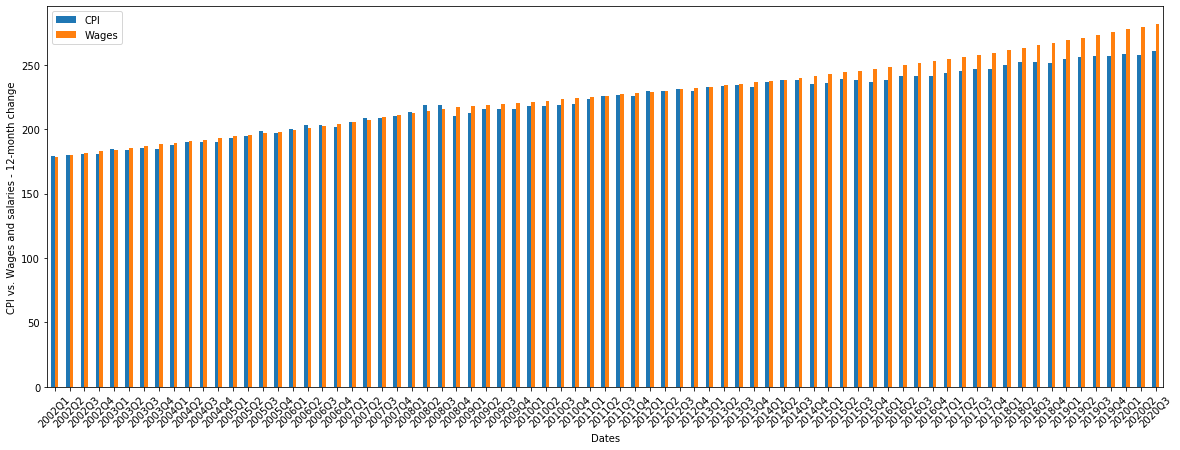

In [15]:
ax = merged_data.plot(kind='bar', figsize=(20, 7))
ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')

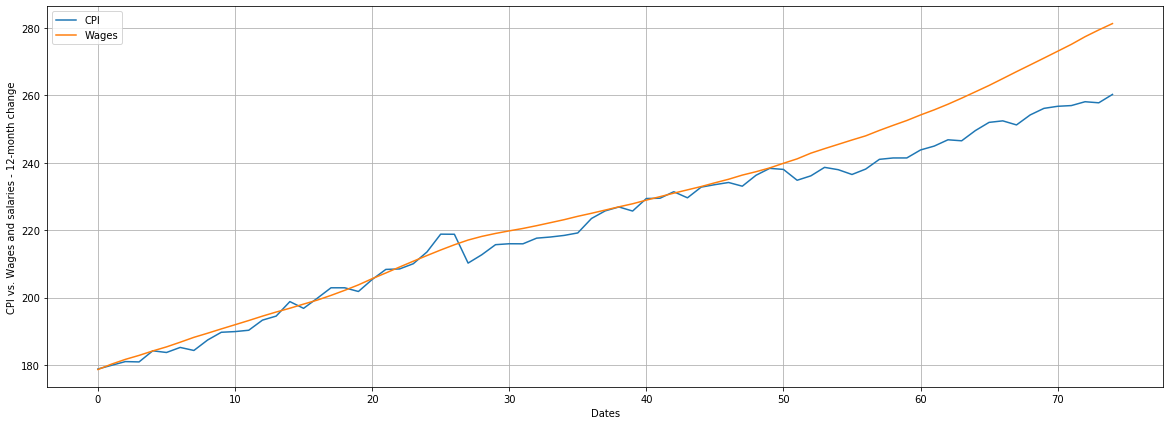

In [16]:
ax = merged_data.plot(kind='line', figsize=(20, 7))
#ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')
ax.grid()

In [17]:
# Incorporate S&P 500 quotes

In [18]:
sp = pd.read_csv('new_s_p_500.csv')

In [19]:
sp

,Date,Open,High,Low,Close
0,01/02/02,1154.67,1154.67,1136.23,1154.67
1,01/03/02,1165.27,1165.27,1154.01,1165.27
2,01/04/02,1172.51,1176.55,1163.42,1172.51
3,01/07/02,1164.89,1176.97,1163.55,1164.89
4,01/08/02,1160.71,1167.60,1157.46,1160.71
...,...,...,...,...,...
4779,12/24/20,3694.03,3703.82,3689.32,3703.06
4780,12/28/20,3723.03,3740.51,3723.03,3735.36
4781,12/29/20,3750.01,3756.12,3723.31,3727.04
4782,12/30/20,3736.19,3744.63,3730.21,3732.04


In [20]:
sp['Date'] = sp['Date'].astype('datetime64[ns]')

In [21]:
sp['Date'] = sp['Date'].dt.strftime('%Y-%m-%d')

In [22]:
sp['Date'] = sp['Date'].str.replace('-03-30', 'Q1')
sp['Date'] = sp['Date'].str.replace('-06-30', 'Q2')
sp['Date'] = sp['Date'].str.replace('-09-30', 'Q3')
sp['Date'] = sp['Date'].str.replace('-12-31', 'Q4')

In [23]:
sp = sp[(sp.Date.str.contains("Q") == True)]

In [24]:
sp1 = sp[['Date', 'Close']]

In [26]:
from functools import reduce
dfs = [newcpi, newwages, sp1]
df_triple = reduce(lambda left,right:
                   pd.merge(left,right,on='Date'), dfs)

In [27]:
#df2 = sp1.sort_index(axis=0 ,ascending=True)

Text(0.5, 0, 'Dates')

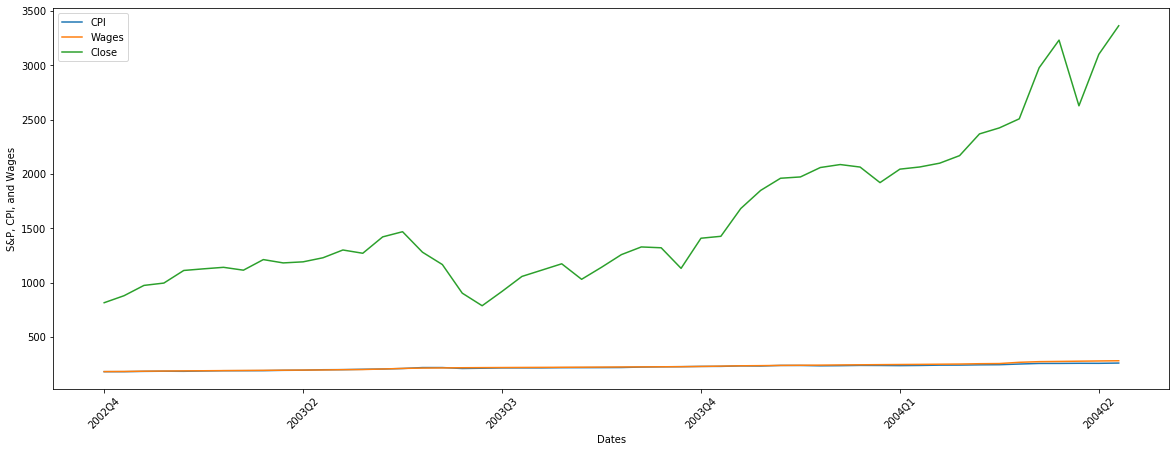

In [28]:
ax = df_triple.plot(kind='line', figsize=(20, 7))
ax.set_xticklabels(df_triple.Date, rotation=45)
ax.set_ylabel('S&P, CPI, and Wages')
ax.set_xlabel('Dates')

Text(0.5, 0, 'Dates')

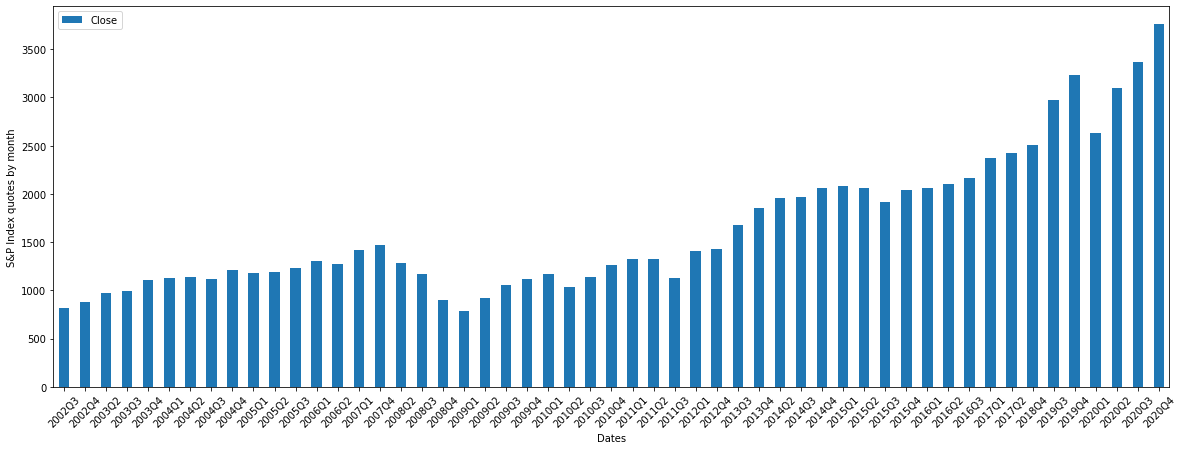

In [29]:
ax = sp1.plot(kind='bar', figsize=(20, 7))
ax.set_xticklabels(sp1.Date, rotation=45)
ax.set_ylabel('S&P Index quotes by month')
ax.set_xlabel('Dates')

Text(0.5, 0, 'Dates')

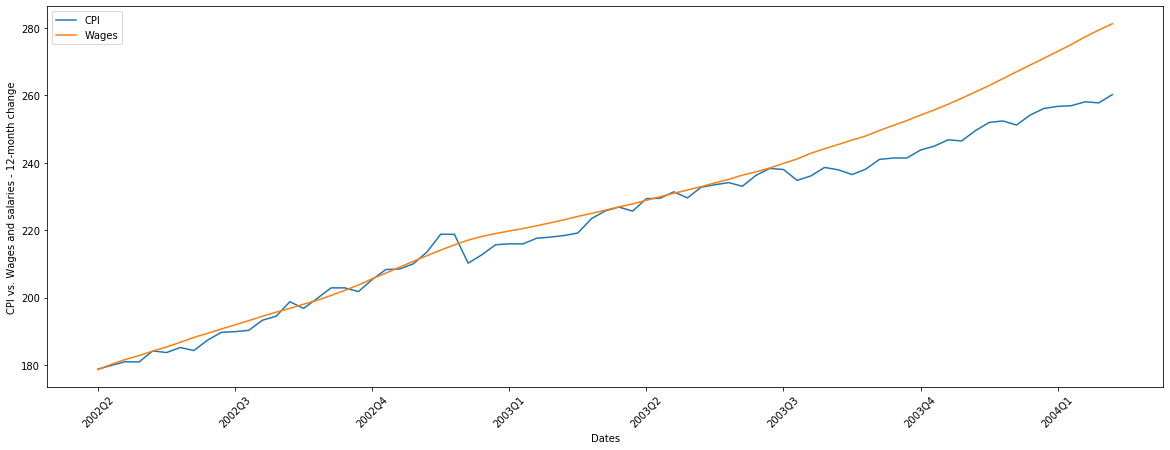

In [30]:
ax = merged_data.plot(kind='line', figsize=(20, 7))
ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')

In [40]:
first = 815.28
last = 3756.07
periods = 20
    
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1

print ('The S&P had a CAGR of {:.2%} '.format(CAGR(first, last, periods)))

The S&P had a CAGR of 7.94% 


In [41]:
first = 178.8
last = 260.28
periods = 20
    
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1

print ('The Consumer Price Index had a CAGR of {:.2%} 
       '.format(CAGR(first, last, periods)))

The Consumer Price Index had a CAGR of 1.90% 


In [42]:
first = 178.64
last = 281.31
periods = 20
    
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1

print ('Wages had a CAGR of {:.2%} '.format(CAGR(first, last, periods)))

Wages had a CAGR of 2.30% 
